    Note : this file is considered as the main code of my project for the Brainhack-school 2024. 


- If you didn't, please read the README file to download the dataset and install requirements 

- You may have to modify the PATH in the code to reproduce the project

- Some of the code comments are written in French, sorry for that

# Dataset exploration

First let's have a look of the dataset : 

File /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/sub-01/func/sub-01_task-sleep_run-4_bold.nii.gz not found.
File /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/sub-01/func/sub-01_task-sleep_run-5_bold.nii.gz not found.
File /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/sub-01/func/sub-01_task-sleep_run-6_bold.nii.gz not found.
File /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/sub-01/func/sub-01_task-sleep_run-7_bold.nii.gz not found.
File /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/sub-01/func/sub-01_task-sleep_run-8_bold.nii.gz not found.
Number of fmri_images :  5
Number of T1_images :  1
fMRI images :


/home/rduchadeau/miniconda3/lib/python3.12/site-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


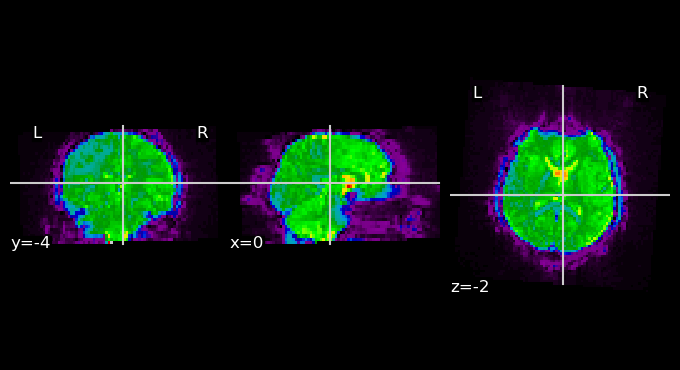

/home/rduchadeau/miniconda3/lib/python3.12/site-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


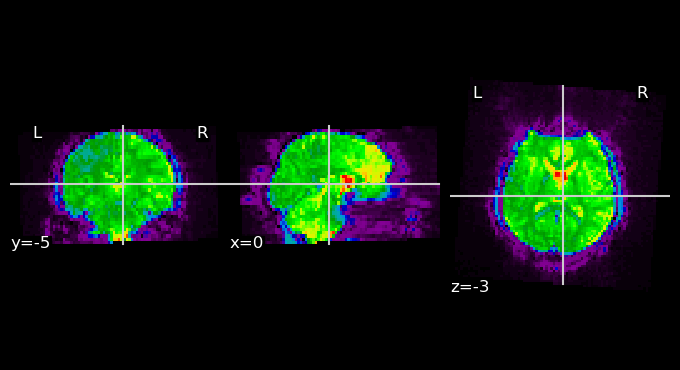

T1 image: 


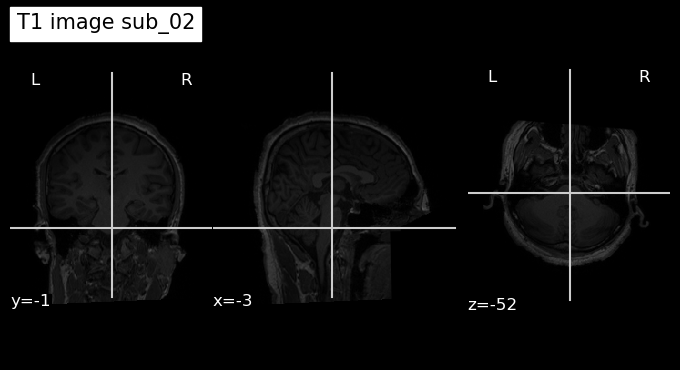

In [5]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting, image

# ************* Function definition *************
# Load fmri and T1 scan
def load_fmri_and_T1_data(dataset_path, subjects, sessions):
    fmri_images = []
    T1_images = []
    for subj in subjects:
        # Chemin vers l'image T1
        t1_img_path = os.path.join(dataset_path, subj, 'anat', f'{subj}_T1w.nii.gz')
        if os.path.exists(t1_img_path):
            T1_img = nib.load(t1_img_path)
            T1_images.append(T1_img)
            
            for sess in sessions:
                fmri_path = os.path.join(dataset_path, subj, 'func', f'{subj}_{sess}_bold.nii.gz')
                if os.path.exists(fmri_path):
                    fmri_img = nib.load(fmri_path)
                    fmri_images.append(fmri_img)
                    
                else:
                    print(f"File {fmri_path} not found.")
        else:
            print(f"File {t1_img_path} not found.")
    return fmri_images, T1_images

# Fonction pour visualiser une image 4D
def visualize_4d_fmri(fmri_img):
    # Sélectionner la première image temporelle pour la visualisation
    first_volume = image.index_img(fmri_img, 0)
    plotting.plot_epi(first_volume)
    plt.show()

# ************* PATH definition *************
dataset_path = '/ds003768-download'


# List of subjects
# # All the subjects
# subjects = ['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-06', 'sub-07', 'sub-08', 'sub-09']
# for i in range(10, 34):
#     subjects.append(f'sub-{i:02d}')
# Just one
subjects = ['sub-01']

# Liste des sessions
sessions = ['task-rest_run-1', 'task-rest_run-2' ] + [f'task-sleep_run-{i}' for i in range(1, 9)]

# Charger les données fMRI
fmri_images, T1_images = load_fmri_and_T1_data(dataset_path, subjects, sessions)
print("Number of fmri_images : ", len(fmri_images))
print("Number of T1_images : ", len(T1_images))

print("fMRI images :")
visualize_4d_fmri(fmri_images[0])
visualize_4d_fmri(fmri_images[4])
print("T1 image: ")
plotting.plot_anat(T1_images[0], title=f"T1 image sub_0{i+1}")
plt.show()



Now that we can read the fMRI data we will explore the sleep reports to know when the subjects were sleeping

# Read CSV file to know when sleeping

/tmp/ipykernel_93035/2485566638.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['sleep_stage_mapped'] = session_data['30-sec_epoch_sleep_stage'].map(stage_mapping)


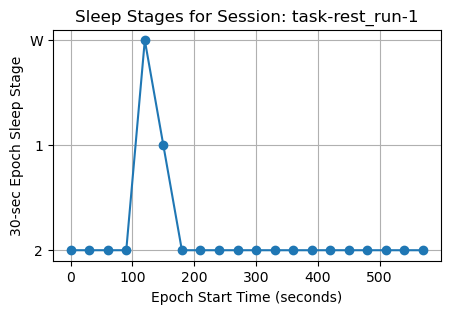

/tmp/ipykernel_93035/2485566638.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['sleep_stage_mapped'] = session_data['30-sec_epoch_sleep_stage'].map(stage_mapping)


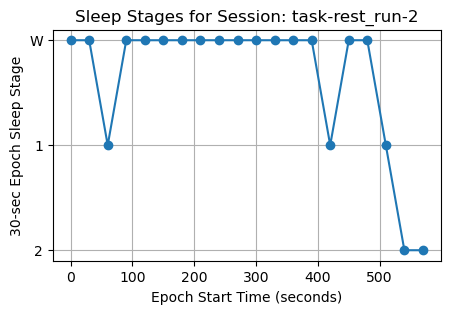

No data available for session: task-rest_run-3
No data available for session: task-rest_run-4
No data available for session: task-rest_run-5
No data available for session: task-rest_run-6
No data available for session: task-rest_run-7
No data available for session: task-rest_run-8


/tmp/ipykernel_93035/2485566638.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['sleep_stage_mapped'] = session_data['30-sec_epoch_sleep_stage'].map(stage_mapping)


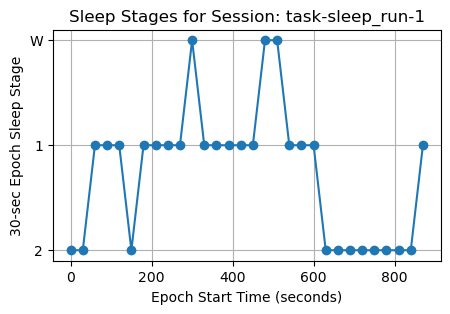

/tmp/ipykernel_93035/2485566638.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['sleep_stage_mapped'] = session_data['30-sec_epoch_sleep_stage'].map(stage_mapping)


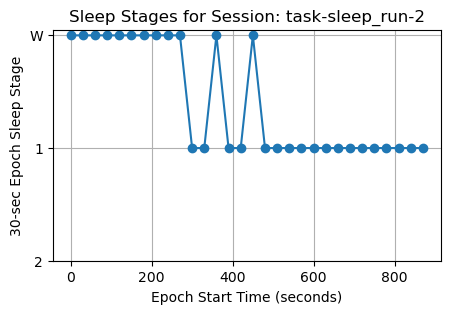

/tmp/ipykernel_93035/2485566638.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['sleep_stage_mapped'] = session_data['30-sec_epoch_sleep_stage'].map(stage_mapping)


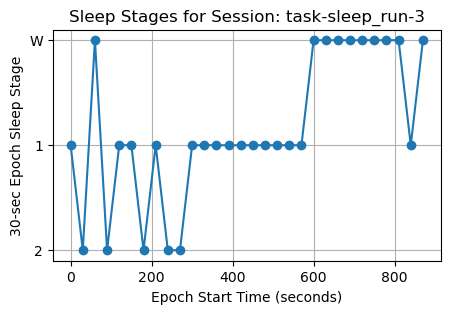

No data available for session: task-sleep_run-4
No data available for session: task-sleep_run-5
No data available for session: task-sleep_run-6
No data available for session: task-sleep_run-7
No data available for session: task-sleep_run-8


In [ ]:
import pandas as pd

# Numero du sujet a plot
subj = 'sub-01'

# Chemin vers le fichier TSV
tsv_file = os.path.join(dataset_path, 'sourcedata',f'{subj}-sleep-stage.tsv')

# Lire le fichier TSV avec pandas
sleep_data = pd.read_csv(tsv_file, sep='\t')

for session in sessions:
    session_data = sleep_data[sleep_data['session'] == session]

    if not session_data.empty:
        # Mapper les stades de sommeil à des valeurs numériques
        stage_mapping = {'W': 2, '1': 1, '2': 0}
        session_data['sleep_stage_mapped'] = session_data['30-sec_epoch_sleep_stage'].map(stage_mapping)

        # Tracer 30-sec_epoch_sleep_stage en fonction de epoch_start_time_sec
        plt.figure(figsize=(5, 3))
        plt.plot(session_data['epoch_start_time_sec'], session_data['sleep_stage_mapped'], marker='o', linestyle='-')
        plt.yticks([2, 1, 0], ['W', '1', '2'])  # Définir les labels de l'axe y
        plt.xlabel('Epoch Start Time (seconds)')
        plt.ylabel('30-sec Epoch Sleep Stage')
        plt.title(f'Sleep Stages for Session: {session}')
        plt.grid(True)
        plt.show()
    else:
        print(f"No data available for session: {session}")

We can see that the data are labeled only every 30s. Theses label do not fit with the temporal resolution of our fMRI datas. Let's fix that

## Fixing temporal resolution

First, what is the problem ?

In [6]:
import os
import nibabel as nib
import pandas as pd

# Définir les chemins
dataset_path = '/ds003768-download'
subject = 'sub-01'
session = 'task-rest_run-1'  # Exemple de session, à remplacer par la session souhaitée

# Charger les données fMRI
fmri_path = os.path.join(dataset_path, subject, 'func', f'{subject}_{session}_bold.nii.gz')
if os.path.exists(fmri_path):
    fmri_img = nib.load(fmri_path)
    fmri_data = fmri_img.get_fdata()
    num_volumes = fmri_data.shape[-1]  # Nombre de volumes
    header = fmri_img.header
    tr = header.get_zooms()[-1]  # Temps de répétition (TR)
    acquisition_time = num_volumes * tr  # Temps total d'acquisition
    print(f'Number of fMRI data for  {subject} {session}: {num_volumes}')
    print(f'Acquisition time for {subject} {session}: {acquisition_time:.2f} secondes')
else:
    print(f'File {fmri_path} not found.')

# Charger les données de sommeil
tsv_file = os.path.join(dataset_path, 'sourcedata', f'{subject}-sleep-stage.tsv')
if os.path.exists(tsv_file):
    sleep_data = pd.read_csv(tsv_file, sep='\t')
    session_data = sleep_data[sleep_data['session'] == session]
    num_labels = len(session_data)
    total_label_time = num_labels * 30  # 30 secondes par label
    print(f'Total number of label for  {subject} {session}: {num_labels}')
    print(f'Acquisition time of label for {subject} {session}: {total_label_time} secondes')
else:
    print(f'File {tsv_file} not found.')

Number of fMRI data for  sub-01 task-rest_run-1: 286
Acquisition time for sub-01 task-rest_run-1: 600.60 secondes
Total number of label for  sub-01 task-rest_run-1: 20
Acquisition time of label for sub-01 task-rest_run-1: 600 secondes


We observe in this code example that the temporal resolution between the labels and the fMRI images is not the same. This poses a problem for our study. There are two ways to address this issue:

1. Increase the number of labels to match the number of fMRI images by extrapolating.
2. Select only the fMRI data for which we have a label.

Extrapolating data is rarely a good idea, so we will stick with the second solution. The problem is that we do not know exactly when the data was taken to assign the labels and whether they are associated with a specific fMRI image. To address this issue, we can:

1. Select the fMRI images at the times of the label measurements, hoping that they correspond.
2. If this does not work, we can subsequently average the fMRI images around the label point, but again, there are limitations.

--> Let's try with only select the fMRI data were the label is avaliable

##  Select the fMRI data were the label is avaliable

Let's directly save the files whith a good name in a specific folder :

In [ ]:
import os
import nibabel as nib
import numpy as np
import pandas as pd
from nilearn import image, plotting
import matplotlib.pyplot as plt

# Fonction pour charger les fichiers fMRI et les labels des fichiers TSV
def load_labeled_fmri_data_and_save(dataset_path, output_path, subjects, sessions):
    for subj in subjects:
        print("****************\nSubject loading:", subj)
        tsv_file_path = os.path.join(dataset_path, 'sourcedata', f'{subj}-sleep-stage.tsv')
        
        if os.path.exists(tsv_file_path):
            sleep_data = pd.read_csv(tsv_file_path, sep='\t')

            for sess in sessions:
                fmri_path = os.path.join(dataset_path, subj, 'func', f'{subj}_{sess}_bold.nii.gz')
                
                if os.path.exists(fmri_path):
                    fmri_img = nib.load(fmri_path)
                    
                    # Filtrer les données pour la session actuelle
                    session_data = sleep_data[sleep_data['session'] == sess].copy()
                    
                    # Convertir la colonne en chaîne de caractères
                    session_data['30-sec_epoch_sleep_stage'] = session_data['30-sec_epoch_sleep_stage'].astype(str)
                    
                    # Filtrer les données incertaines
                    session_data = session_data[~session_data['30-sec_epoch_sleep_stage'].str.contains('uncertain')]
                    
                    if not session_data.empty:
                        # Mapper les stades de sommeil à des valeurs numériques
                        stage_mapping = {'W': 0, '1': 1, '2': 2, '3': 3}  # 0 pour éveil, 1 pour sommeil
                        session_data['sleep_stage_mapped'] = session_data['30-sec_epoch_sleep_stage'].map(stage_mapping)
                        # Extraire les start_time des labels
                        session_data['epoch_start_time_sec'] = pd.to_numeric(session_data['epoch_start_time_sec'], errors='coerce')
                        start_times = session_data['epoch_start_time_sec'].values
                        print(f"For session {sess} all startimes are : {start_times}")
                        
                        # Obtenir le nombre de tranches temporelles
                        num_timepoints = fmri_img.shape[-1]
                        print(f"Nombre de tranches temporelles pour {subj} {sess}: {num_timepoints}")

                        # Nombre de points temporels à considérer
                        tr = fmri_img.header.get_zooms()[-1]  # Utiliser le TR réel de l'acquisition fMRI
                        print("tr : ", tr)
                        num_extracted_fmri = 0
                        
                        # Créer une liste pour stocker les images 3D correspondant aux labels
                        for start_time in start_times:
                            if np.isnan(start_time):
                                continue
                            # Trouver l'index temporel le plus proche du start_time
                            idx = int(round(start_time / tr))
                            if idx < num_timepoints:  # Vérifier que l'index est valide
                                fmri_img_3d = image.index_img(fmri_img, idx)
                                label = session_data[session_data['epoch_start_time_sec'] == start_time]['sleep_stage_mapped'].values[0]
                                
                                # Définir le chemin de sauvegarde
                                output_dir = os.path.join(output_path, subj)
                                if not os.path.exists(output_dir):
                                    os.makedirs(output_dir)
                                
                                output_file = os.path.join(output_dir, f'{subj}_{sess}_sec_{start_time}_label_{label}.nii.gz')
                                fmri_img_3d.to_filename(output_file)
                                num_extracted_fmri += 1

                        print(f"\nSession {sess} pour le sujet {subj}: {session_data['sleep_stage_mapped'].values}")
                        print(f"Nombre de labels pour la session {sess}: {len(session_data['sleep_stage_mapped'].values)}")
                        print(f"Nombre de fichiers fMRI extraits pour la session {sess}: {num_extracted_fmri}")

                    else:
                        print(f"Aucune donnée disponible pour la session: {sess}")
                else:
                    print(f"Fichier {fmri_path} non trouvé.")
        else:
            print(f"Fichier {tsv_file_path} non trouvé.")
    
    return

########## Main ###########
# Définir le chemin de base vers les données
dataset_path = '/ds003768-download/'
working_dir_path = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/'
output_path = os.path.join(working_dir_path, 'fMRI_labeled_data')

# Liste des sessions
sessions = ['task-rest_run-1'] + ['task-rest_run-2'] + [f'task-sleep_run-{i}' for i in range(1, 9)]
print("Number of sessions : ", len(sessions))

# Charger les données fMRI et les labels correspondants et les sauvegarder
load_labeled_fmri_data_and_save(dataset_path, output_path, subjects, sessions)
print("Loading and saving data completed.")


Now, let's check that we can recover the data with the associated labels:

Loaded 20 images with 20 labels for task-rest_run-1


/home/rduchadeau/miniconda3/lib/python3.12/site-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


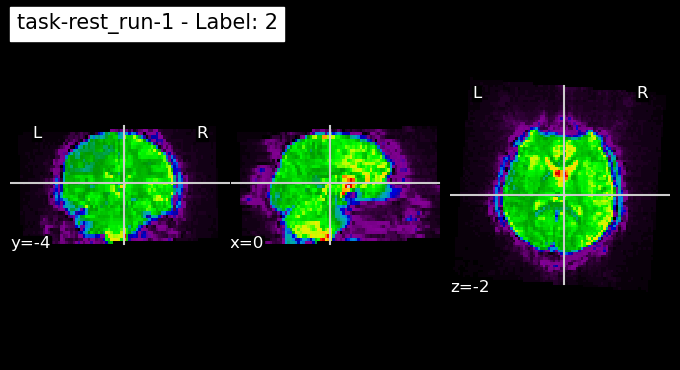

In [8]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting

def load_fmri_images(data_dir, subject, session):
    # print(f"Loading subject {subject} session {session}")
    session_dir = os.path.join(data_dir, subject)
    images = []
    labels = []
    
    for file in os.listdir(session_dir):
        if session in file and file.endswith('.nii.gz'):
            # print(f"Session {session} trouvée dans fichier {file} ")
            file_path = os.path.join(session_dir, file)
            img = nib.load(file_path)
            images.append(img)
            
            # Extraire le label du nom du fichier
            label = file.split('_label_')[1].split('.nii.gz')[0]
            # print(f"Label extrait : {label}")
            labels.append(int(label))
    
    return images, labels

def plot_fmri_images(images, labels, session):
    plotting.plot_epi(images[0], title=f'{session} - Label: {labels[0]}')
    plotting.show()

########## Main ###########
data_dir = '/fMRI_labeled_data'
subject = 'sub-01'
session = 'task-rest_run-1'

# Charger les images fMRI et les labels correspondants
images, labels = load_fmri_images(data_dir, subject, session)
print(f"Loaded {len(images)} images with {len(labels)} labels for {session}")

# Tracer les images fMRI avec leurs labels
plot_fmri_images(images, labels, session)


Nice it works! Let's make a function to only load the PATH of the fMRI data. We will have to use this function in the folowing part.

In [9]:
def path_fmri_images(data_dir, subject, session):
    session_dir = os.path.join(data_dir, subject)
    images_path = []
    labels = []
    
    for file in os.listdir(session_dir):
        if session in file and file.endswith('.nii.gz'):
            # print(f"Session {session} trouvée dans fichier {file} ")
            images_path.append(os.path.join(session_dir, file)) 
            
            # Extraire le label du nom du fichier
            label = file.split('_label_')[1].split('.nii.gz')[0]
            # print(f"Label extrait : {label}")
            labels.append(int(label))
    
    return images_path, labels

########## Main ###########
data_dir = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/fMRI_labeled_data'
subject = 'sub-01'
session = 'task-rest_run-1'

# Charger les images fMRI et les labels correspondants
images_path, labels = path_fmri_images(data_dir, subject, session)
print(f"Loaded {len(images)} images with {len(labels)} labels for {session}")

for i in range (0, len(images_path)):
    print(f"Images path : {images_path[i]} label : {labels[i]}")


Loaded 20 images with 20 labels for task-rest_run-1
Images path : /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/fMRI_labeled_data/sub-01/sub-01_task-rest_run-1_sec_270_label_2.nii.gz label : 2
Images path : /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/fMRI_labeled_data/sub-01/sub-01_task-rest_run-1_sec_450_label_2.nii.gz label : 2
Images path : /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/fMRI_labeled_data/sub-01/sub-01_task-rest_run-1_sec_360_label_2.nii.gz label : 2
Images path : /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/fMRI_labeled_data/sub-01/sub-01_task-rest_run-1_sec_60_label_2.nii.gz label : 2
Images path : /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/fMRI_labeled_data/sub-01/sub-01_task-rest_run-1_sec_240_label_2.nii.gz label : 2
Images path : /home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/fMRI_labeled_data/sub-01/sub-01_task-rest_run-1_sec_510_label_2.nii.gz label : 2
Images path : /home

# Preprocessing

Now that we have our labeled data; we need to extract the brain and align it to T1 scan so that we can work with theses datas. If we skip this part the algorithm may work but it will probably overfit a lot (by recognising the shape of the skull insted of the brain activity for instance)

To preprocess the data we wil use FSL thru the nipype workflow to integrate all the tools in python.

## Lets' try just for one scan to plot the intermediates results

240612-14:20:12,691 nipype.workflow INFO:
	 [Node] Setting-up "gunzip_func" in "/tmp/tmphyg09yah/gunzip_func".
240612-14:20:12,696 nipype.workflow INFO:
	 [Node] Executing "gunzip_func" <nipype.algorithms.misc.Gunzip>


240612-14:20:12,702 nipype.workflow INFO:
	 [Node] Finished "gunzip_func", elapsed time 0.00403s.


/home/rduchadeau/miniconda3/lib/python3.12/site-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


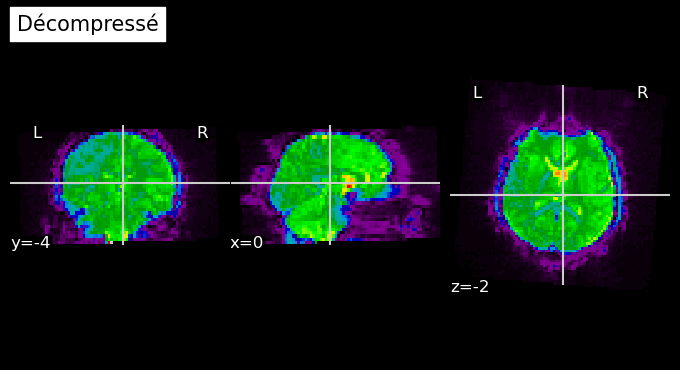

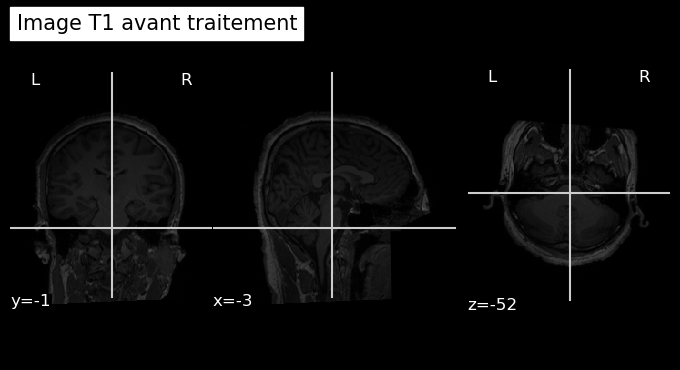

240612-14:20:18,534 nipype.workflow INFO:
	 [Node] Setting-up "flirt" in "/tmp/tmpksq3h3qu/flirt".
240612-14:20:18,539 nipype.workflow INFO:
	 [Node] Executing "flirt" <nipype.interfaces.fsl.preprocess.FLIRT>
240612-14:20:24,737 nipype.workflow INFO:
	 [Node] Finished "flirt", elapsed time 6.196002s.


/home/rduchadeau/miniconda3/lib/python3.12/site-packages/nilearn/image/resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


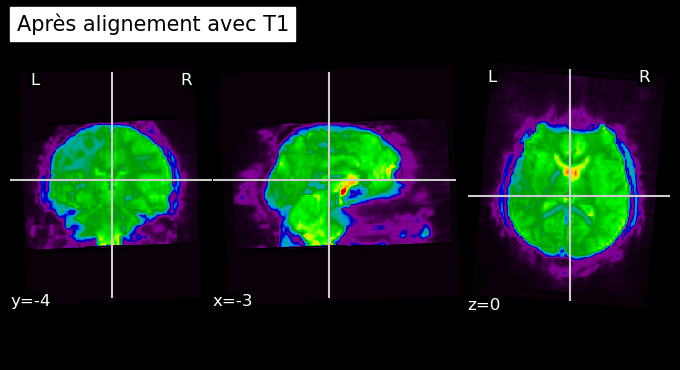

240612-14:20:29,210 nipype.workflow INFO:
	 [Node] Setting-up "extract" in "/tmp/tmphq9de5s1/extract".
240612-14:20:29,215 nipype.workflow INFO:
	 [Node] Executing "extract" <nipype.interfaces.fsl.preprocess.BET>
240612-14:20:31,352 nipype.workflow INFO:
	 [Node] Finished "extract", elapsed time 2.134787s.


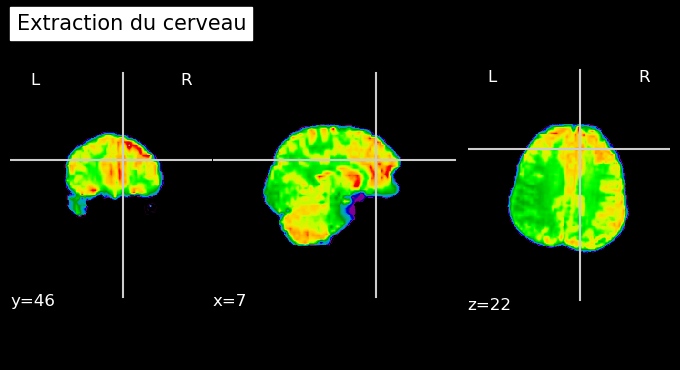

/home/rduchadeau/miniconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


Check Alignement : 


/home/rduchadeau/miniconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
gio: http://localhost:46551/index.html: Operation not supported


RuntimeError: Failed to open nilearn plot or report in a web browser.

In [12]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting, image
from nipype.interfaces.fsl import BET, FLIRT
from nipype.algorithms.misc import Gunzip
from nipype import Node

# ************* PATH definition *************
labeled_data_path = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/fMRI_labeled_data/'
dataset_path = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/'
subject = 'sub-01'
working_dir = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/working_directory'
output_dir = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/fmri_preprocessed_data'

t1_img_path = os.path.join(dataset_path, subject, 'anat', f'{subject}_T1w.nii.gz')
fmri_path = os.path.join(labeled_data_path, subject, 'sub-01_task-rest_run-1_sec_0_label_2.nii.gz')

# ************* Functions definition *************
# Fonction pour visualiser une image 3D
def visualize_3d_img(img, title):
    plotting.plot_epi(img, title=title)
    plt.show()

def visualize_3d_img_anat(img, title):
    plotting.plot_anat(img, title=title)
    plt.show()

# ************* Workflow initialisation *************

# Décompression de l'image fMRI
gunzip_node = Node(Gunzip(), name='gunzip_func')
gunzip_node.inputs.in_file = fmri_path
gunzip_res = gunzip_node.run()
decompressed_img = nib.load(gunzip_res.outputs.out_file)
visualize_3d_img(decompressed_img, "Décompressé")

# Visualisation de l'image T1 avant traitement
T1_image = nib.load(t1_img_path)
visualize_3d_img_anat(T1_image, "Image T1 avant traitement")

# Alignement de l'image fMRI avec l'image T1
flirt_node = Node(FLIRT(), name='flirt')
flirt_node.inputs.in_file = gunzip_res.outputs.out_file
flirt_node.inputs.reference = t1_img_path
flirt_node.inputs.dof = 6  # Degrees of freedom
flirt_node.inputs.cost = 'normmi'  # Normalized mutual information
flirt_node.inputs.interp = 'trilinear'  # Interpolation method
flirt_node.inputs.searchr_x = [-90, 90]  # Search angles
flirt_node.inputs.searchr_y = [-90, 90]
flirt_node.inputs.searchr_z = [-90, 90]
flirt_res = flirt_node.run()
flirt_img = nib.load(flirt_res.outputs.out_file)
visualize_3d_img(flirt_img, "Après alignement avec T1")

# Extraction du cerveau directement sur l'image alignée
bet_node = Node(BET(), name='extract')
bet_node.inputs.frac = 0.4
bet_node.inputs.in_file = flirt_res.outputs.out_file
bet_res = bet_node.run()
extracted_img = nib.load(bet_res.outputs.out_file)
visualize_3d_img(extracted_img, "Extraction du cerveau")
plotting.view_img(extracted_img, title=f"Extraction du cerveau avec frac {bet_node.inputs.frac}")
plt.show()

# No normalisation for now

# Vérification de l'alignement avec l'image T1
print("Check Alignement : ")
plotting.view_img(extracted_img, bg_img=T1_image, title="Image fMRI prétraitée").open_in_browser()


**Note:** For some reason the open_in_browser() function raise an error for me but the link is still clickable

Ok, the workflow seems to work. Let's do the same of all the data and save the results in a specific folder

In [ ]:
import os
import nibabel as nib
import numpy as np
from nilearn import plotting, image
from nipype.interfaces.fsl import BET, FLIRT
from nipype.algorithms.misc import Gunzip
from nipype import Node

# ************* PATH definition *************
labeled_data_path = '/fMRI_labeled_data/'
dataset_path = '/ds003768-download/'
working_dir = '/working_directory'
output_dir = '/fmri_preprocessed_data'

# Liste des sessions
sessions = ['task-rest_run-1', 'task-rest_run-2' ] + [f'task-sleep_run-{i}' for i in range(1, 9)]
# sessions = ['task-rest_run-1', 'task-sleep_run-1'] # Pour test

# Liste des sujets
subjects = ['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-06', 'sub-07', 'sub-08', 'sub-09']
for i in range(10, 34):
    subjects.append(f'sub-{i:02d}')
# subjects = ['sub-01', 'sub-02']  # Pour test

# ************* Function for file loading *************
def path_fmri_images(data_dir, subject, session):
    session_dir = os.path.join(data_dir, subject)
    images_path = []
    labels = []
    
    for file in os.listdir(session_dir):
        if session in file and file.endswith('.nii.gz'):
            images_path.append(os.path.join(session_dir, file))
            
            # Extract the label from the filename
            label_str = file.split('_label_')[1].split('.nii.gz')[0]
            label = float(label_str)
            if label.is_integer():
                label = int(label)
            labels.append(label)
    
    return images_path, labels

# ************* Workflow processing for each subject *************
for subject in subjects:
    for session in sessions:
        print(f"*****\nProcessing subject: {subject}, session: {session}\n*****")

        t1_img_path = os.path.join(dataset_path, subject, 'anat', f'{subject}_T1w.nii.gz')
        all_fmri_path, labels = path_fmri_images(labeled_data_path, subject, session)
        
        # Check if the session exists for this subject
        if len(all_fmri_path) != 0:
            for i in range(len(all_fmri_path)): 
                fmri_path = all_fmri_path[i]

                try:
                    # Decompress the fMRI image
                    gunzip_node = Node(Gunzip(), name='gunzip_func')
                    gunzip_node.inputs.in_file = fmri_path
                    gunzip_res = gunzip_node.run()
                    decompressed_img = nib.load(gunzip_res.outputs.out_file)
                    
                    # Align the fMRI image with the T1 image
                    flirt_node = Node(FLIRT(), name='flirt')
                    flirt_node.inputs.in_file = gunzip_res.outputs.out_file
                    flirt_node.inputs.reference = t1_img_path
                    flirt_node.inputs.dof = 6  # Degrees of freedom
                    flirt_node.inputs.cost = 'normmi'  # Normalized mutual information
                    flirt_node.inputs.interp = 'trilinear'  # Interpolation method
                    flirt_node.inputs.searchr_x = [-90, 90]  # Search angles
                    flirt_node.inputs.searchr_y = [-90, 90]
                    flirt_node.inputs.searchr_z = [-90, 90]
                    flirt_res = flirt_node.run()
                    flirt_img = nib.load(flirt_res.outputs.out_file)

                    # Brain extraction on the aligned image
                    bet_node = Node(BET(), name='extract')
                    bet_node.inputs.frac = 0.4
                    bet_node.inputs.in_file = flirt_res.outputs.out_file
                    bet_res = bet_node.run()
                    extracted_img = nib.load(bet_res.outputs.out_file)

                    # Save the final preprocessed image
                    subject_output_dir = os.path.join(output_dir, subject)
                    os.makedirs(subject_output_dir, exist_ok=True)
                    final_image_path = os.path.join(subject_output_dir, os.path.basename(fmri_path).replace('.nii.gz', '_preprocessed.nii.gz'))
                    nib.save(extracted_img, final_image_path)
                    # print(f"The final preprocessed image has been saved to: {final_image_path}")

                except Exception as e:
                    print(f"Error processing {fmri_path}: {e}")

        else:
            print(f"**** session {session} empty for subject {subject} ****")

print("*****\nProcessing completed for all subjects.\n*****")


# Define ROI

We now have our final dataset to train our machine learning algorithm. However, providing too much data to the algorithm increases the risk of overfitting. Therefore, we need to specify the region of interest (ROI) using an atlas.

## Find an atlas

Since we're using rs-fmri data, it makes sense to use an atlas defined using rs-fmri data

This paper has many excellent insights about what kind of atlas to use for an rs-fmri machine learning task. See in particular Figure 5.
https://www.sciencedirect.com/science/article/pii/S1053811919301594?via%3Dihub

Let's use the MIST atlas (Urchs et al. 2019) 
* Created here in Montreal using the BASC method (Bellec et al., 2015). 
* Has multiple resolutions, for larger networks or finer-grained ROIs. 

Let's use a 64-ROI atlas to allow some detail, but to ultimately keep our connectivity matrices manageable

Here is a link to the MIST paper: https://mniopenresearch.org/articles/1-3

In [3]:
from nilearn import datasets
import nibabel as nib
import numpy as np

parcellations = datasets.fetch_atlas_basc_multiscale_2015(version='sym')
atlas_filename = parcellations.scale064

print('Atlas ROIs are located in nifti image (4D) at: %s' %
       atlas_filename)

# Charger l'atlas pour vérifier le nombre de ROIs
atlas_img = nib.load(atlas_filename)
atlas_data = atlas_img.get_fdata()

# Compter le nombre de ROI (étiquettes uniques, en excluant le fond)
unique_labels = np.unique(atlas_data)
num_rois = len(unique_labels) - 1  # Exclure le label de fond (généralement 0)
print(f"Number of ROI in the atlas : {num_rois}")

Atlas ROIs are located in nifti image (4D) at: /home/rduchadeau/nilearn_data/basc_multiscale_2015/template_cambridge_basc_multiscale_nii_sym/template_cambridge_basc_multiscale_sym_scale064.nii.gz
Number of ROI in the atlas : 64


Our atlas defines 64 ROI, let's have a visual representation of them

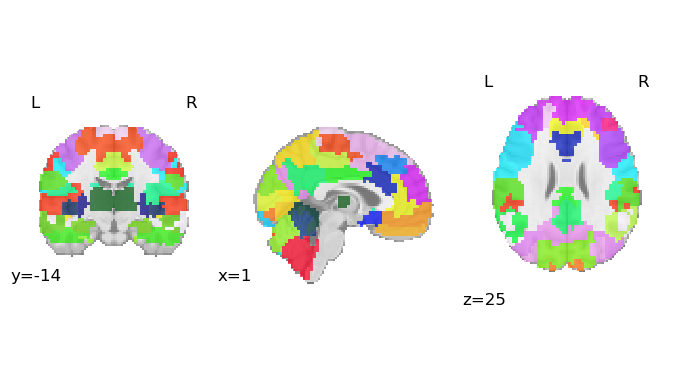

In [5]:
from nilearn import plotting

plotting.plot_roi(atlas_filename, draw_cross=False)

## Align the atlas

Our atlas is now loaded but before using it we need to align the altas with our T1 scan so taht the ROI we be correcly placed in our fMRI data (also aligned with T1 scan)

    We will align our atlas once for every subject and store the aligned atlas to, in the following part extract ROI from every preprocessed data

In [ ]:
import os
import nibabel as nib
from nipype.interfaces.fsl import FLIRT
import numpy as np

# ************* PATH definition *************
fmri_preprocessed_data_path = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/fmri_preprocessed_data/'
output_dir = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project'
dataset_path = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/'
aligned_atlas_dir = os.path.join(output_dir, 'aligned_atlas')
os.makedirs(aligned_atlas_dir, exist_ok=True)

subjects = ['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-06', 'sub-07', 'sub-08', 'sub-09']
for i in range(10, 34):
    subjects.append(f'sub-{i:02d}')

# ************* Load atlas *************
parcellations = datasets.fetch_atlas_basc_multiscale_2015(version='sym')
atlas_filename = parcellations.scale064

print('Atlas ROIs are located in nifti image (4D) at: %s' % atlas_filename)

# Load the atlas to check the number of ROIs
atlas_img = nib.load(atlas_filename)
atlas_data = atlas_img.get_fdata()

# Count the number of ROIs (unique labels, excluding the background)
unique_labels = np.unique(atlas_data)
num_rois = len(unique_labels) - 1  # Exclude the background label (usually 0)
print(f"Number of ROI in the atlas : {num_rois}")


# ************* Workflow processing for each subject and session *************
for subject in subjects:
    t1_img_path = os.path.join(dataset_path, subject, 'anat', f'{subject}_T1w.nii.gz')
    
    if os.path.exists(t1_img_path):
        flirt = FLIRT()
        flirt.inputs.in_file = atlas_filename
        flirt.inputs.reference = t1_img_path
        flirt.inputs.out_file = os.path.join(aligned_atlas_dir, f'aligned_atlas_{subject}.nii.gz')
        flirt.inputs.dof = 6  # Degrees of freedom
        flirt.inputs.cost = 'normmi'  # Normalized mutual information
        flirt.inputs.interp = 'trilinear'  # Interpolation method
        flirt.inputs.searchr_x = [-90, 90]  # Search angles
        flirt.inputs.searchr_y = [-90, 90]
        flirt.inputs.searchr_z = [-90, 90]
        flirt_res = flirt.run()
        
        print(f"Aligned atlas saved for subject {subject}")
    else:
        print(f"T1 image not found for subject {subject}")

print("*****\nProcessing completed for all subjects.\n*****")


Let's check if our atlas are correctly aligned:

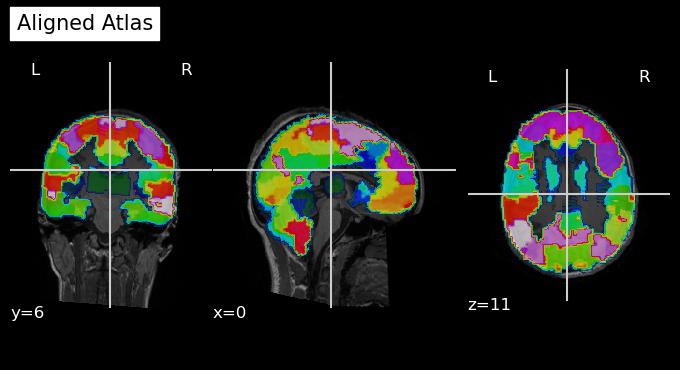

In [14]:
import os
import nibabel as nib
from nilearn import plotting
import matplotlib.pyplot as plt

# Define paths
aligned_atlas_dir = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/aligned_atlas'
dataset_path = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ds003768-download/'
subject = 'sub-02'  # Change to the desired subject

# Paths to the aligned atlas and T1 scan
aligned_atlas_path = os.path.join(aligned_atlas_dir, f'aligned_atlas_{subject}.nii.gz')
t1_img_path = os.path.join(dataset_path, subject, 'anat', f'{subject}_T1w.nii.gz')

# Load images
aligned_atlas = nib.load(aligned_atlas_path)
t1_scan = nib.load(t1_img_path)

# Plot the aligned atlas with the T1 scan as background
plotting.plot_roi(aligned_atlas, bg_img=t1_scan, title="Aligned Atlas")
plt.show()

It worked! Now we can apply our aligned atlas to the data:

In [ ]:
import os
import nibabel as nib
from nilearn.input_data import NiftiLabelsMasker
import numpy as np

# ************* PATH definition *************
fmri_preprocessed_data_path = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/fmri_preprocessed_data/'
output_dir = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project'
aligned_atlas_dir = os.path.join(output_dir, 'aligned_atlas')
roi_values_dir = os.path.join(output_dir, 'ROI_of_fmri')
os.makedirs(roi_values_dir, exist_ok=True)

subjects = ['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-06', 'sub-07', 'sub-08', 'sub-09']
for i in range(10, 34):
    subjects.append(f'sub-{i:02d}')

# ************* Load aligned atlas and process fMRI *************
for subject in subjects:
    print(f"Processing subject: {subject}")

    aligned_atlas_path = os.path.join(aligned_atlas_dir, f'aligned_atlas_{subject}.nii.gz')
    if os.path.exists(aligned_atlas_path):
        aligned_atlas = nib.load(aligned_atlas_path)

        # Apply the masker
        masker = NiftiLabelsMasker(labels_img=aligned_atlas, standardize=True, memory='nilearn_cache', verbose=0)
        
        fmri_subject_dir = os.path.join(fmri_preprocessed_data_path, subject)
        roi_subject_dir = os.path.join(roi_values_dir, subject)
        os.makedirs(roi_subject_dir, exist_ok=True)
        
        for fmri_file in os.listdir(fmri_subject_dir):
            if fmri_file.endswith('_preprocessed.nii.gz'):
                fmri_path = os.path.join(fmri_subject_dir, fmri_file)
                fmri_img = nib.load(fmri_path)
                roi_values = masker.fit_transform(fmri_img)
                roi_values_path = os.path.join(roi_subject_dir, f'roi_values_{fmri_file}.npy')
                np.save(roi_values_path, roi_values)
                
        print(f"Aligned atlas processed for subject {subject}")
    else:
        print(f"Aligned atlas not found for subject {subject}")

print("*****\nProcessing completed for all subjects.\n*****")


Let's check if the roi are correctly extracted from the fmri data:

Shape of the ROI values: (1, 1163661)


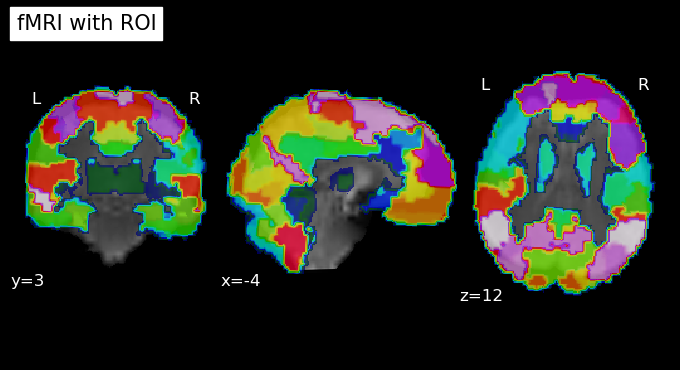

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting
from nilearn.image import resample_to_img
import nibabel as nib

# ************* PATH definition *************
output_dir = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project'
roi_values_dir = os.path.join(output_dir, 'ROI_of_fmri')
aligned_atlas_dir = os.path.join(output_dir, 'aligned_atlas')
fmri_preprocessed_data_path = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/fmri_preprocessed_data'
subject = 'sub-01'  # Change to the desired subject
fmri_file = 'sub-01_task-rest_run-1_sec_0_label_2_preprocessed.nii.gz'  # Change to the desired fMRI file

# Path to the ROI values file
roi_values_path = os.path.join(roi_values_dir, subject, f'roi_values_{fmri_file}.npy')

# Load ROI values
roi_values = np.load(roi_values_path)

# Verify the shape of the ROI values
print(f"Shape of the ROI values: {roi_values.shape}")

# ************* Visualize fMRI data with ROI *************
# Load aligned atlas
aligned_atlas_path = os.path.join(aligned_atlas_dir, f'aligned_atlas_{subject}.nii.gz')
aligned_atlas = nib.load(aligned_atlas_path)

# Load the fMRI image
fmri_path = os.path.join(fmri_preprocessed_data_path, subject, fmri_file)
fmri_img = nib.load(fmri_path)

# Resample the atlas to match the fMRI image dimensions
resampled_atlas = resample_to_img(aligned_atlas, fmri_img, interpolation='nearest')

# Visualize the fMRI data with the ROI superimposed
plotting.plot_roi(resampled_atlas, bg_img=fmri_img, title="fMRI with ROI", draw_cross=False)
plt.show()


Now, our datas are fully exploitable and we can give them to our machine learning algorithm

# Machine learning algorithm

20 files loaded for subject sub-01
20 files loaded for subject sub-02
20 files loaded for subject sub-03
20 files loaded for subject sub-04
20 files loaded for subject sub-05
20 files loaded for subject sub-06
20 files loaded for subject sub-07
20 files loaded for subject sub-08
20 files loaded for subject sub-09
X shape: (180, 1161300)
y shape: (180,)
X_reduced shape: (177, 8)
X_train shape: (141, 8)
X_test shape: (36, 8)
y_train shape: (141,)
y_test shape: (36,)
Validation Accuracy: 0.7371428571428571
Mean Absolute Error: -0.3904761904761904
Test Accuracy: 0.6944444444444444
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79        17
         1.0       1.00      0.31      0.47        13
         2.0       0.67      0.67      0.67         6

    accuracy                           0.69        36
   macro avg       0.77      0.66      0.64        36
weighted avg       0.78      0.69      0.65        36



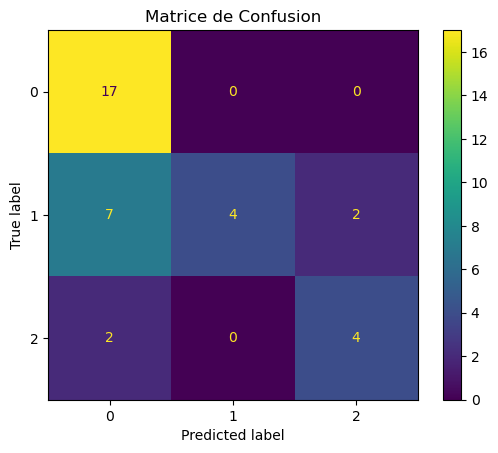

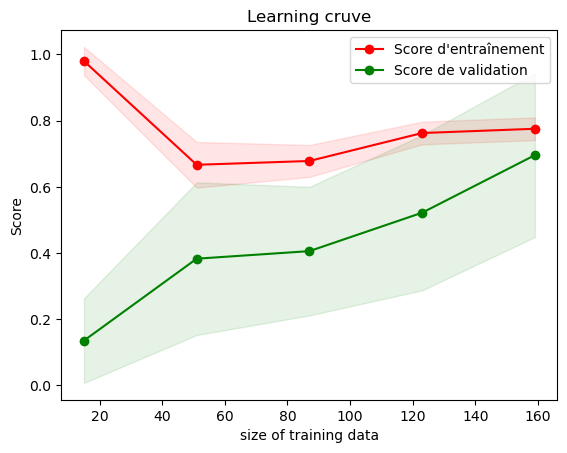

In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_predict, cross_val_score
import matplotlib.pyplot as plt

# ************* Définition des chemins *************
roi_values_dir = '/home/rduchadeau/Desktop/Brainhack_school/duchadeau_project/ROI_of_fmri'
subjects = ['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-06', 'sub-07', 'sub-08', 'sub-09']
max_files_per_subject = 20  # Limiter le nombre de fichiers à 20 par sujet

# ************* Charger les données ROI et les étiquettes *************
X = []  # Caractéristiques
y = []  # Étiquettes
subject_ids = []  # Identifiants des sujets pour la stratification
min_length = None  # Longueur minimale trouvée parmi toutes les données

for subject in subjects:
    subject_dir = os.path.join(roi_values_dir, subject)
    subject_files = [file for file in os.listdir(subject_dir) if file.endswith('.npy')]
    
    if len(subject_files) > max_files_per_subject:
        subject_files = subject_files[:max_files_per_subject]  # Limiter le nombre de fichiers
    
    for file in subject_files:
        roi_values_path = os.path.join(subject_dir, file)
        roi_values = np.load(roi_values_path)
        flattened_values = roi_values.flatten()
        
        if min_length is None or len(flattened_values) < min_length:
            min_length = len(flattened_values)
        
        label_str = file.split('_label_')[1].split('_preprocessed')[0]
        label = float(label_str)
        if label.is_integer():
            label = int(label)
        X.append(flattened_values)
        y.append(label)
        subject_ids.append(subject)
            
    print(f"{len(subject_files)} files loaded for subject {subject}")

# Ajuster toutes les données à la longueur minimale
X = [x[:min_length] for x in X]

X = np.array(X)
y = np.array(y)
subject_ids = np.array(subject_ids)
print('X shape: {}'.format(X.shape))
print('y shape: {}'.format(y.shape))

# Vérifier s'il y a des NaN dans y et les supprimer
if np.isnan(y).any():
    mask = ~np.isnan(y)
    X = X[mask]
    y = y[mask]
    subject_ids = subject_ids[mask]

# ************* Réduction de dimensionnalité avec PCA *************
pca = PCA(n_components=0.90)  # Garde 90% de la variance
X_reduced = pca.fit_transform(X)
print('X_reduced shape: {}'.format(X_reduced.shape))

# ************* Répartition des données en ensembles d'entraînement et de test *************
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=42, 
                                                    stratify=subject_ids)

print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))

# ************* Utiliser la validation croisée *************
clf = SVC(kernel='linear', probability=True)

# Prédictions avec validation croisée
y_pred = cross_val_predict(clf, X_train, y_train, cv=10)

# Scores de validation croisée
acc = cross_val_score(clf, X_train, y_train, cv=10)
mae = cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')

print(f"Validation Accuracy: {np.mean(acc)}")
print(f"Mean Absolute Error: {np.mean(mae)}")

# ************* Faire des prédictions et évaluer le modèle *************
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# ************* Visualisations *************

# Matrice de confusion
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Matrice de Confusion')
plt.show()

# Courbes d'apprentissage
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    SVC(kernel='linear'), X_reduced, y, cv=10, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 5)
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")

plt.xlabel("size of training data")
plt.ylabel("Score")
plt.title("Learning cruve")
plt.legend(loc="best")
plt.show()
